# 🚲 Bike Sharing Assignment

# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes?

How well those variables describe the bike demands?

Goal:

To develop a model in order to find the variables which are significant in explaining the demand for shared bikes.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
bikesharing_data = pd.read_csv('day.csv')

In [3]:
bikesharing_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
bikesharing_data.shape

(730, 16)

In [5]:
bikesharing_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikesharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning 

Creating a copy of the original dataset before making any changes so that we have access to it even after it has been altered.

In [8]:
df_copy = bikesharing_data.copy()

According to data dictionary, `instant` is a record instant and does not add any value to the analysis. Therefore, it makes sense to drop this attribute.

In [9]:
bikesharing_data.drop('instant', axis=1, inplace=True)

Also, the attribute `dteday` refers to the date of the record. Now more attributes, like weekday have already been derived from it. Therefore, it makes sense to drop this attribute too.

In [10]:
bikesharing_data.drop('dteday', axis=1, inplace=True)

## Checking for Null Values

In [11]:
bikesharing_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values, means we are good to proceed.

## Checking for Outliers

<AxesSubplot:ylabel='hum'>

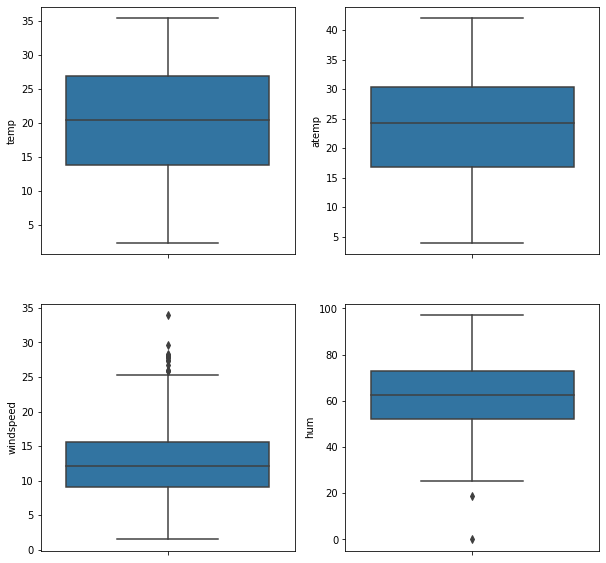

In [12]:
fig , axes = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(ax = axes[0,0], data = bikesharing_data, y = 'temp')
sns.boxplot(ax = axes[0,1], data = bikesharing_data, y = 'atemp')
sns.boxplot(ax = axes[1,0], data = bikesharing_data, y = 'windspeed')
sns.boxplot(ax = axes[1,1], data = bikesharing_data, y = 'hum')

Windspeed seems to have some outliers, other than that, data seems to be in a good shape for further analysis.

## 📊Exploratory Data Analysis

According to the data dictionary, there are certain attribtes which are categorical in nature but have been converted to numbers already. It is important to map them according to data dictionary in order to have a more detailed look on the graphs.

In [13]:
bikesharing_data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace = True)
bikesharing_data['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace = True)
bikesharing_data['weathersit'].replace({1: 'Favourable', 2: 'Moderate', 3: 'Harsh', 4: 'Extreme'}, inplace=True)
bikesharing_data['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 7: 'Sun'}, inplace=True)

## EDA: Categorical Variables

## Plotting Categorical Variables Against the Target Variable

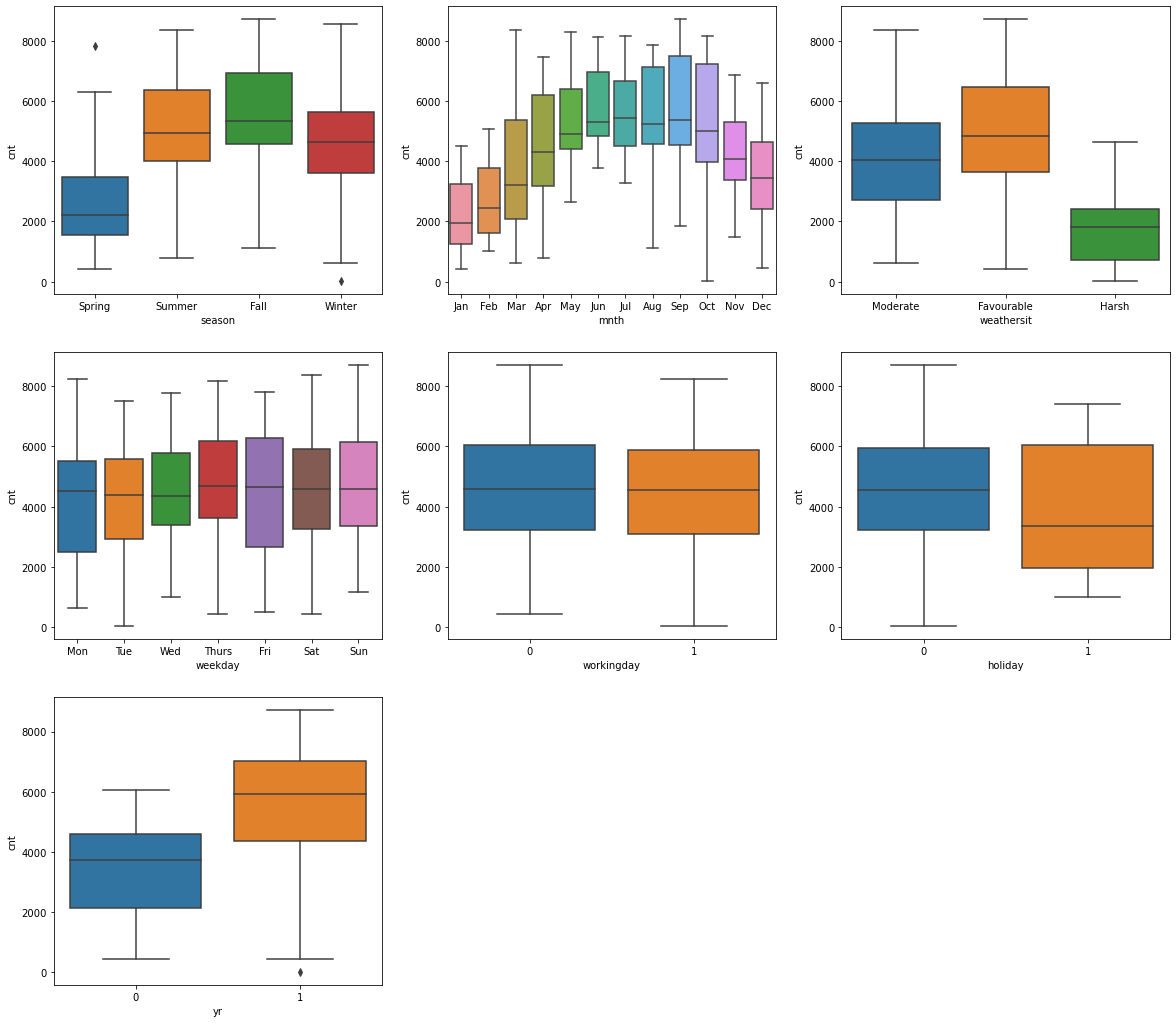

In [14]:
fig, axes = plt.subplots(3,3,figsize=(20,18))
sns.boxplot(ax = axes[0, 0], x = bikesharing_data['season'], y = bikesharing_data['cnt'])
sns.boxplot(ax = axes[0, 1], x = bikesharing_data['mnth'], y = bikesharing_data['cnt'])
sns.boxplot(ax = axes[0, 2], x = bikesharing_data['weathersit'], y = bikesharing_data['cnt'])
sns.boxplot(ax = axes[1, 0], x = bikesharing_data['weekday'], y = bikesharing_data['cnt'])
sns.boxplot(ax = axes[1, 1], x = bikesharing_data['workingday'], y = bikesharing_data['cnt'])
sns.boxplot(ax = axes[1, 2], x = bikesharing_data['holiday'], y = bikesharing_data['cnt'])
sns.boxplot(ax = axes[2, 0], x = bikesharing_data['yr'], y = bikesharing_data['cnt'])
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.show()

Insights: 
    
  1. The count seems to have increased from Spring to Summer. Another significant increase can be seen from Summer to Fall.
       However, when it comes to Winter the count has decreased.
       
  2. The months also follow a similar trend with more granular level of information. But the trend remains same, increasing at        the start of theyear and then dipping by the end.
    
  3. According to the weather conditions, moderate and favuorable weather conditions seem to bring the best business. Harsh          weather conditions see a dip.
   
  4. Surprisingly, the weekdays do not seem to have any difference in the business done, when it comes to the median part.            Business has  had a lower range at some days but the overall picture looks to be a uniform one.
    
  5. Business has also been same irrespective of the fact if it is a workingday or not.
    
  6. However, on holidays we have seen a lower count and median value which makes sense. People like to have some time off.
    
  7. Another interesting insight is, the business has seen an increase on the year level. The upper tail of 2018 corresponds 
     to lower tail of 2019 which means the business has significantly attracted more people over the course of time. 

## Plotting Numerical Variables Against the Target Variable

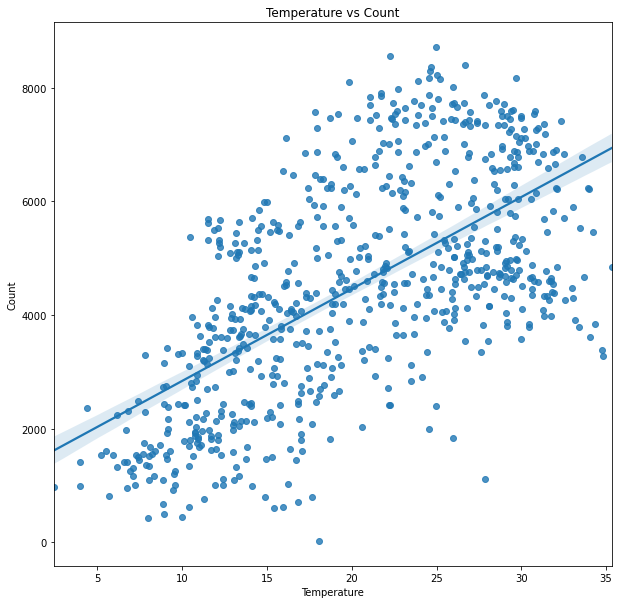

In [15]:
plt.figure(figsize=(10,10))
sns.regplot(data = bikesharing_data, x = 'temp', y = 'cnt')
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

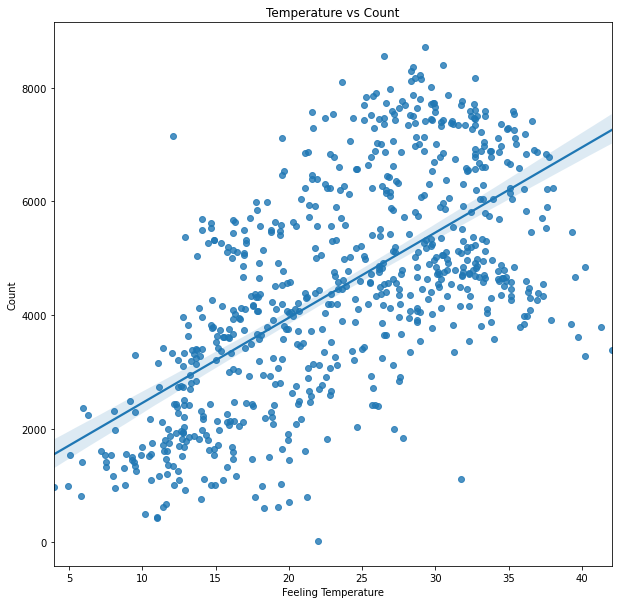

In [16]:
plt.figure(figsize=(10,10))
sns.regplot(data = bikesharing_data, x = 'atemp', y = 'cnt')
plt.title('Temperature vs Count')
plt.xlabel('Feeling Temperature')
plt.ylabel('Count')
plt.show()

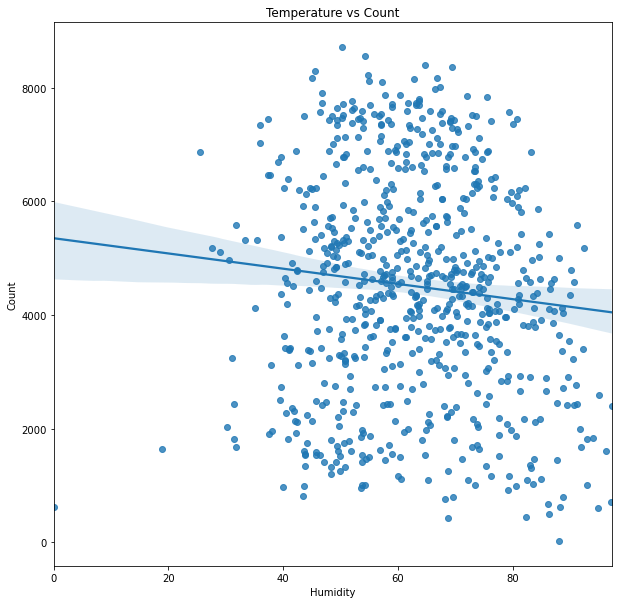

In [17]:
plt.figure(figsize=(10,10))
sns.regplot(data = bikesharing_data, x = 'hum', y = 'cnt')
plt.title('Temperature vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

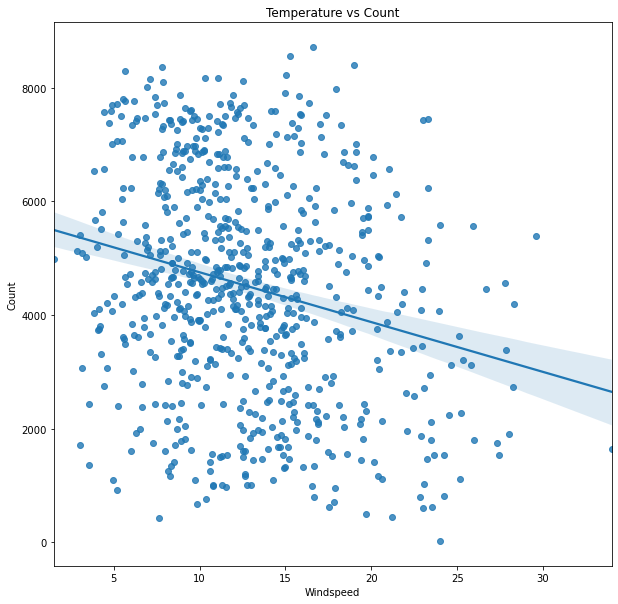

In [18]:
plt.figure(figsize=(10,10))
sns.regplot(data = bikesharing_data, x = 'windspeed', y = 'cnt')
plt.title('Temperature vs Count')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

Insights: 
    
    1. Looks like temp and atemp have almost the same kind of impact on the count.
    
    2. Humidity seems to explain some variability in the count but it is not that significant from the plot.
    
    3. Humidity seems to explain some variability in the count but it is not that significant from the plot.

### Pairplot to find out trends between Numerical Variables

<Figure size 1440x720 with 0 Axes>

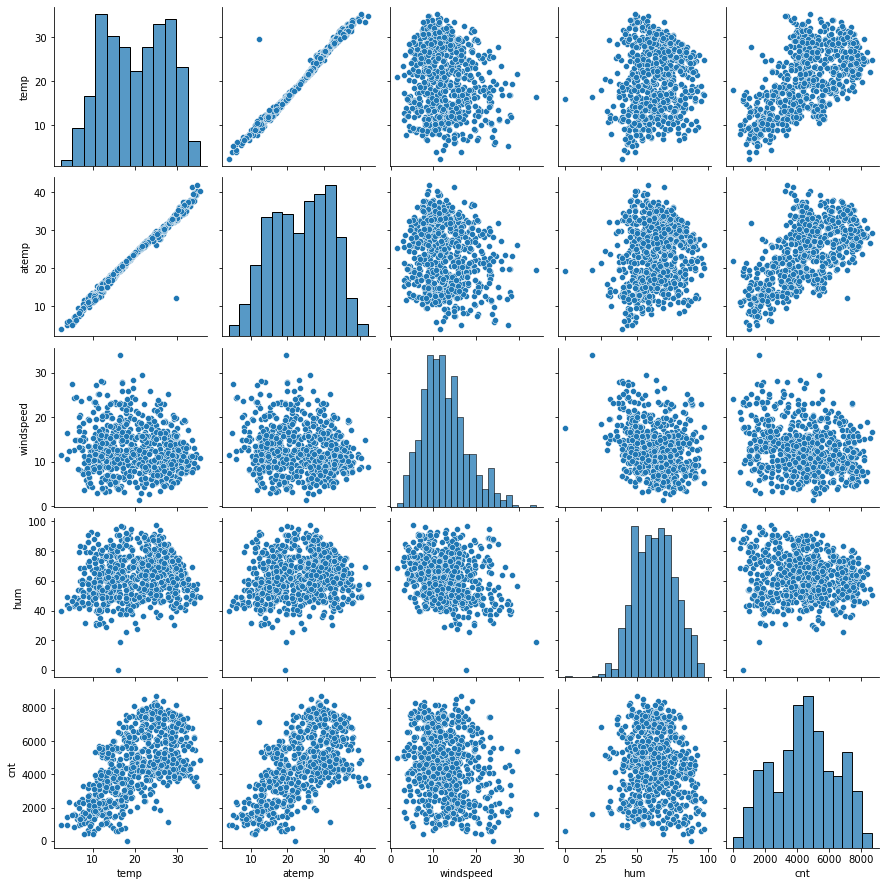

In [19]:
plt.figure(figsize=(20,10))
sns.pairplot(data = bikesharing_data, vars = ['temp', 'atemp', 'windspeed', 'hum', 'cnt'])
plt.show()

Upon giving this plot a good look, it can be very well said that atemp and temp are highly correlated. There is also some sort of linear relationship to be found between temp and cnt.

**Let's take a look at the correlation between the variables.**

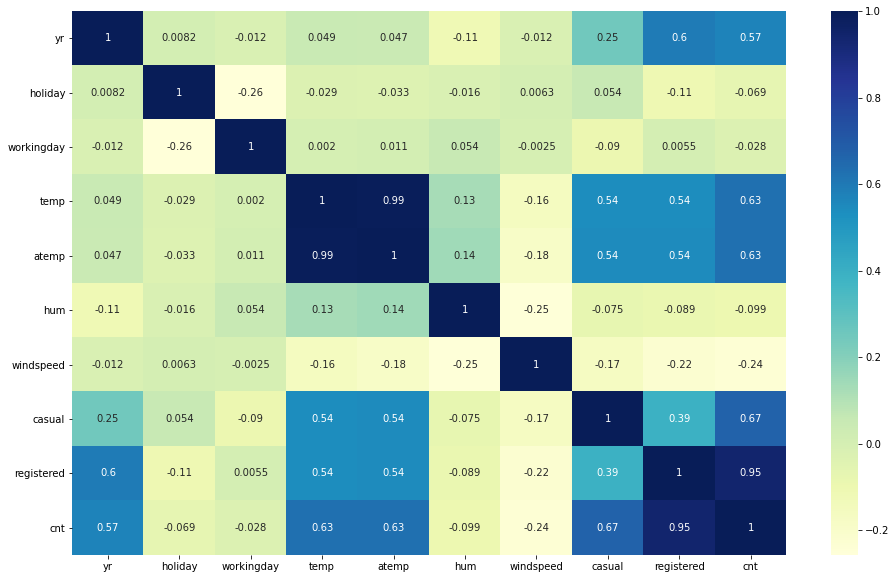

In [20]:
fig, ax = plt.subplots(figsize = (16,10))
ax = sns.heatmap(bikesharing_data.corr(), annot=True, cmap="YlGnBu")

As it is pretty evident from the heatmap, variables temp and atemp are highly correlated with each other. It makes sense to drop one of them before proceeding to modelling.

In [21]:
bikesharing_data.drop('atemp', axis=1, inplace=True)

Another important takeaway is, the target variable is a derived attribute from `casual` and `registered`. Keeping these two variables 
in the analysis does not make any sense as they do not hold any explanatory power.

In [22]:
bikesharing_data.drop(['casual', 'registered'], axis=1, inplace=True)

## Data Preprocessing

In [23]:
bikesharing_data = pd.get_dummies(data = bikesharing_data, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

In [24]:
bikesharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Harsh', 'weathersit_Moderate'],
      dtype='object')

In [25]:
X = bikesharing_data.drop('cnt', axis=1)
y = bikesharing_data['cnt']

In [26]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Harsh,weathersit_Moderate
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

### Splitting into Training and Test Set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.shape, y_train.shape

((511, 28), (511,))

In [30]:
X_test.shape, y_test.shape

((219, 28), (219,))

## Scaling the Numerical Variables

In [31]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Harsh,weathersit_Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,20.550310,63.482145,12.598001,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.346380
std,0.500067,0.163398,0.459303,7.476797,13.939855,4.965253,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.476282
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.079626,52.848700,9.041918,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.354153,64.041700,11.791732,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.940423,73.458300,15.583496,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,28.250014,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
num_cols = ['temp', 'hum', 'windspeed']
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [33]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Harsh,weathersit_Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building the model using an Automated Approach with RFE

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
rfe = RFE(lr, 14)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=14)

Lising out the selected features

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 12),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 3),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', False, 10),
 ('weekday_Thurs', False, 15),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 5),
 ('weathersit_Harsh', True, 1),
 ('weathersit_Moderate', True, 1)]

Now that we have the selected features, the next step would be to select the best features using a manual and more granular approach.

In [37]:
# Function to build a LR model
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [38]:
# Function to calculate VIFs 
def calculate_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Building the models

In [39]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate'],
      dtype='object')

In [40]:
X_train_rfe = X_train.columns[rfe.support_]

## Model 1

In [41]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.03e-186
Time:                        21:24:56   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3281.6898    

**The p-values for all the variables are in the acceptable limit. Therefore, all the variables are significant. However,
checking the VIF scores, the next step would be to drop `hum`.**

## Model 2

In [42]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.75e-184
Time:                        21:24:56   Log-Likelihood:                -4133.2
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2507.3675    

**The p-values for all the variables are in the acceptable limit. Therefore, all the variables are significant. However,
checking the VIF scores, the next step would be to drop `temp`. Another combination can be to drop `temp` and add back `hum`. Implemented in Model - 7** 

## Model 3

In [43]:
cols = ['yr', 'holiday', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.21e-159
Time:                        21:24:57   Log-Likelihood:                -4196.2
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     498   BIC:                             8474.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4934.2275    

**Seems like the attribute `mnth_Jul` has become insignificant. Therefore, it needs to be removed. Another approach can also include removing `mnth_Jul` and adding the `temp` back again. Trying the two combination below.**

## Model 4

In [44]:
cols = ['yr', 'holiday', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec','mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.47e-160
Time:                        21:24:57   Log-Likelihood:                -4197.0
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     499   BIC:                             8469.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4983.4237    

**Looks like `Season_Winter` has become insignificant, therefore removing it.**

## Model 5

In [45]:
cols = ['yr', 'holiday', 'windspeed', 'season_Spring',
        'mnth_Dec','mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     184.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.55e-160
Time:                        21:24:57   Log-Likelihood:                -4198.2
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     500   BIC:                             8465.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5029.6941    

**Removing `mnth_Jul` and adding back `temp`.**

## Model 6

In [46]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec','mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.51e-183
Time:                        21:24:57   Log-Likelihood:                -4138.2
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     498   BIC:                             8357.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2641.7527    

# Model 7

In [47]:
cols = ['yr', 'holiday', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     143.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.44e-158
Time:                        21:24:57   Log-Likelihood:                -4194.9
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     497   BIC:                             8477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5355.7272    

**Looks like `mnth_Jul` has become insignificant, therefore dropping it.**

# Model 8

In [48]:
cols = ['yr', 'holiday', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.22e-159
Time:                        21:24:57   Log-Likelihood:                -4195.6
No. Observations:                 511   AIC:                             8417.
Df Residuals:                     498   BIC:                             8472.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5409.8717    

**Looks like `season_Winter` has become insignificant, therefore dropping it.**

# Model 9

In [49]:
cols = ['yr', 'holiday', 'hum', 'windspeed', 'season_Spring',
        'mnth_Dec', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          6.29e-160
Time:                        21:24:57   Log-Likelihood:                -4196.9
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     499   BIC:                             8469.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5439.6976    

**Looks like `hum` has become insignificant, therefore dropping it.**

# Model 10 

In [50]:
cols = ['yr', 'holiday', 'windspeed', 'season_Spring',
        'mnth_Dec', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     184.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.55e-160
Time:                        21:24:57   Log-Likelihood:                -4198.2
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     500   BIC:                             8465.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5029.6941    

**We have obtained a significant model but seem to have lost some explanatory power as compared to Model 6. Trying to add `temp` to Model 10.**

# Model 11

In [51]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
        'mnth_Dec', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.10e-177
Time:                        21:24:57   Log-Likelihood:                -4155.9
No. Observations:                 511   AIC:                             8336.
Df Residuals:                     499   BIC:                             8387.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3263.5943    

**Stumbled upon yet another significant model, but it still can't beat Model 6. Therefore it is safe to proceed with Model 6 now.**

**The main reason for it being selected include a higher R-squared value. Also, the drop from R-squared to Ajusted R-squared is 
also pretty small. All the attributes have come out to be significant(p-value<0.05) and there's no multicollinearity issue(VIFs < 5.0).**

In [52]:
final_cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec','mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Harsh', 'weathersit_Moderate']
lr = LinearRegression()
lr.fit(X_train[final_cols], y_train)

LinearRegression()

## Residual Analysis on Training Set

**So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.**

In [53]:
y_train_pred = lr.predict(X_train[final_cols])

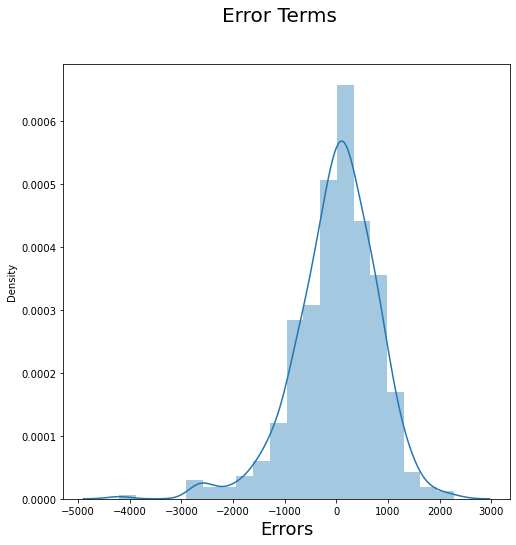

In [54]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,8))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)       
plt.show()

## Plotting the Predicted and Actual Values

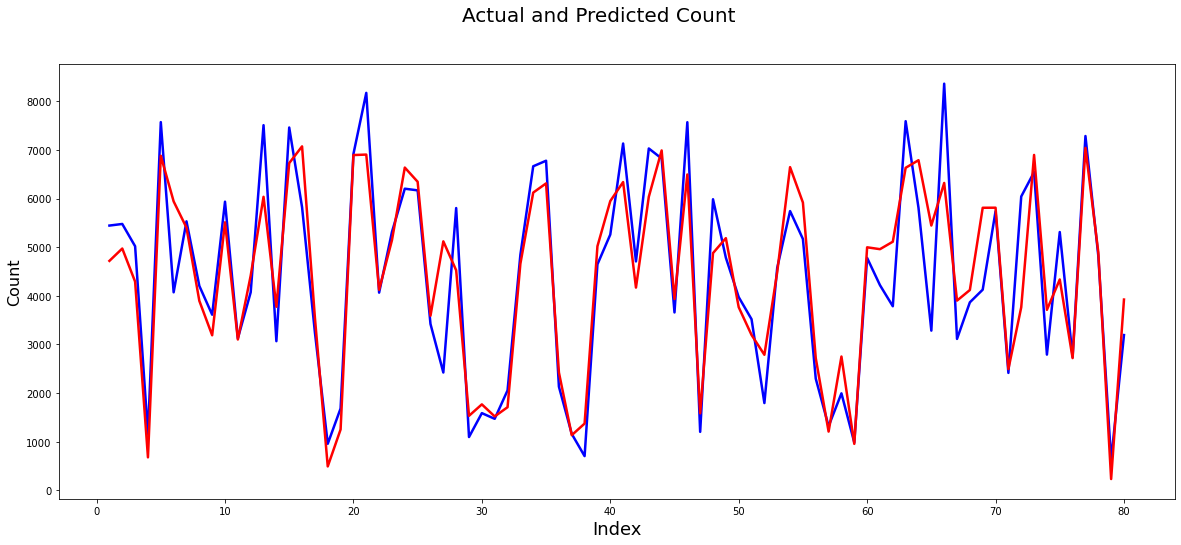

In [55]:
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_train[:80], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred[:80], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted Count', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Count', fontsize=16)    
plt.show()

## Plotting the Error Terms

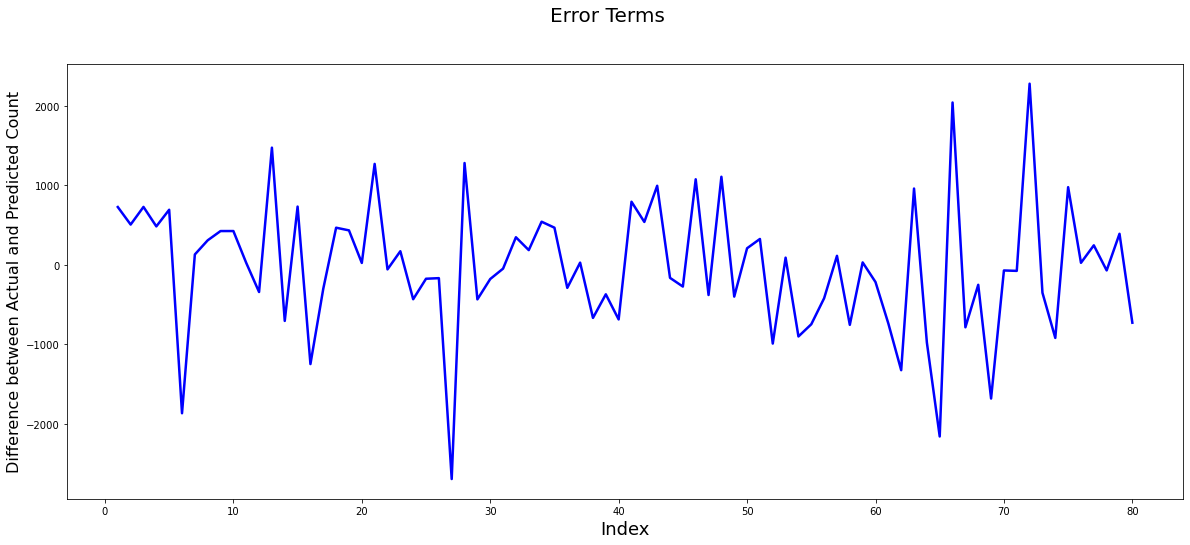

In [56]:
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_train[:80] - y_train_pred[:80], color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Difference between Actual and Predicted Count', fontsize=16)    
plt.show()

**There's no pattern to be found in the error terms, they are independent of each other.**

## Making Predictions on the Test Data

**Before we go ahead and make predictions on the Test data, we need to make sure that we have transformed it using the same scaler with which Training data was transformed and has only the relevant columns that we have selected using RFE.**

In [57]:
X_test.shape

(219, 28)

In [58]:
num_cols

['temp', 'hum', 'windspeed']

In [59]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [60]:
y_test_pred = lr.predict(X_test[final_cols])

In [61]:
from sklearn.metrics import r2_score

In [62]:
# R-squared score on Training Set
r2_score(y_train, y_train_pred)

0.8311455728742286

In [63]:
# R-squared score on Test Set
r2_score(y_test, y_test_pred)

0.8159357640615315

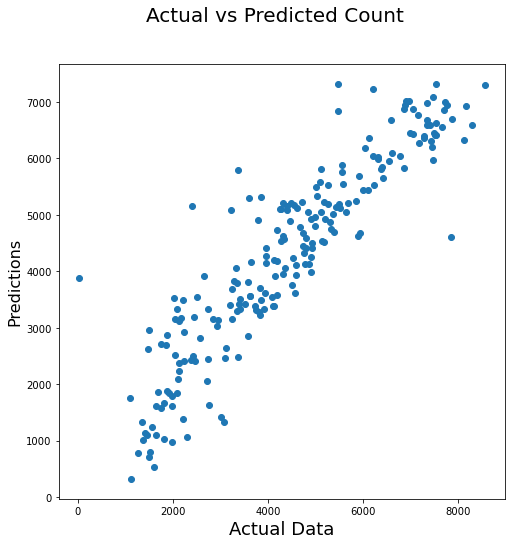

In [64]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted Count', fontsize = 20)              
plt.xlabel('Actual Data', fontsize = 18)                       
plt.ylabel('Predictions', fontsize = 16)      
plt.show()

## Residual Analysis on the Test Set

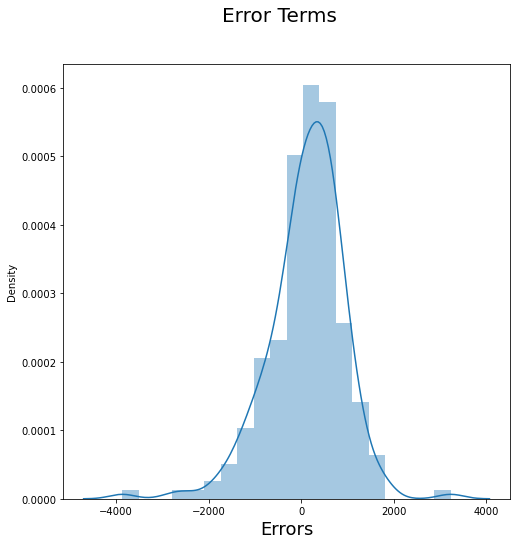

In [65]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,8))
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)       
plt.show()

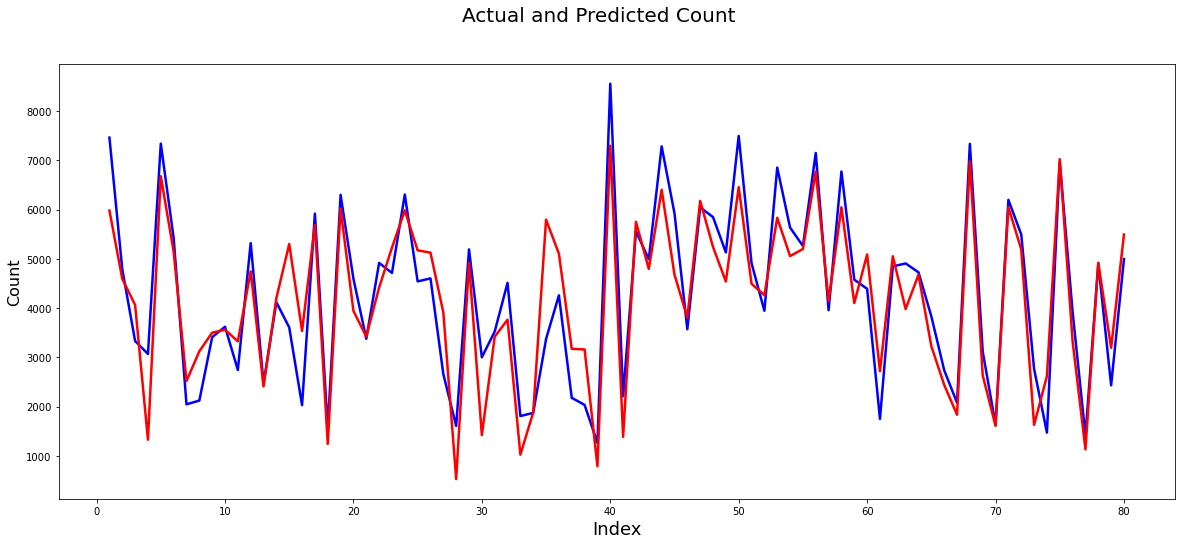

In [66]:
## Plotting the Predicted and Actual Values

c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_test[:80], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred[:80], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted Count', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Count', fontsize=16)    
plt.show()

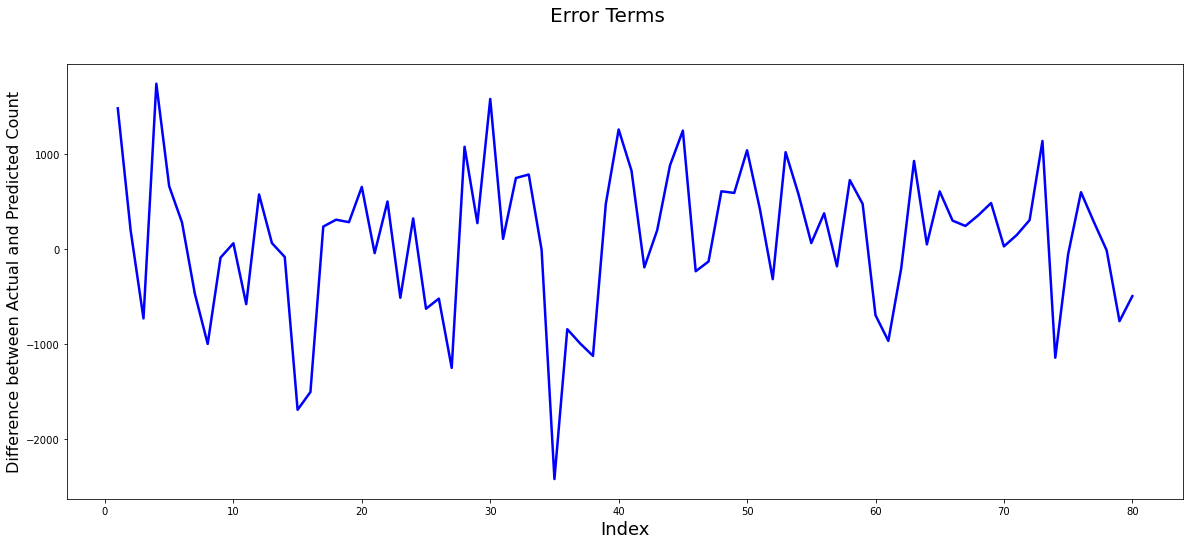

In [67]:
## Plotting the Error Terms

c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_test[:80] - y_test_pred[:80], color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Difference between Actual and Predicted Count', fontsize=16)    
plt.show()

**There's no pattern to be found in the error terms, they are independent of each other.**

## Interpreting the Results

Equation of the best fitted line is obtained as below:
   
   cnt = 2641.7527 + 2000.0848 * yr - 623.6019 * holiday + 3062.4606 * temp - 771.1493 * windspeed - 1394.2980 * season_Spring + 726.5275 * season_Winter - 575.5195 * mnth_Dec + 476.3625 * mnth_Mar - 712.6947 * mnth_Nov + 480.6005 * mnth_Sep - 2286.3359 * weathersit_Harsh - 685.9703 * weathersit_Moderate

In [68]:
lr.coef_

array([ 2000.08484532,  -623.60188708,  3062.46060592,  -771.14926674,
       -1394.29798201,   726.52754502,  -575.51946179,   476.36250622,
        -712.69468286,   480.60045752, -2286.33589732,  -685.97027253])

## Conclusions Drawn

Significant Variables as suggested by the best Model(r2-score: 0.815):
    
 1. Year
 2. Holiday
 3. Temperature
 4. Windspeed
 5. Spring Season
 6. Winter Season
 7. December
 8. March
 9. November
 10. September
 11. Harsh Weather Conditions
 12. Moderate Weather Conditions

1. It is expected for the business to be down when the weather conditions are Moderate(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and Harsh(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).

2. The business goes down at each year's end, to revive business and drive profits BoomBikes can come up with certain offers.

3. It is seen that with the flow of time, the business has seen growth(from 2018 to 2019). BoomBikes can come with customer loyalty programs to widen their permanent customer base.

4. On holidays, it is expected to have less business. BoomBikes can try slashing the prices on holidays as an experiment and in an attempt to have more business.